In [7]:
using IntervalSets, ModelingToolkit
using Sophon
using Optimization, OptimizationOptimJL, OptimizationOptimisers

@parameters t, x
@variables u(..)
Dₜ = Differential(t)
Dₓ = Differential(x)
Dₓ² = Differential(x)^2
Dₓ³ = Differential(x)^3

ν = 0.0025
eqs = [Dₜ(u(t, x)) + Dₓ(u(t, x)) * u(t, x) + ν * Dₓ³(u(t, x)) ~ 0]

bcs = [u(0, x) ~ cospi(x), u(t, -1.0) ~ u(t, 1.0)]

domain = [t ∈ Interval(0.0, 1.0), x ∈ Interval(-1.0, 1.0)]

@named KdV = PDESystem(eqs, bcs, domain, [t, x], [u(t, x)])

PDESystem
Equations: Equation[0.0025Differential(x)(Differential(x)(Differential(x)(u(t, x)))) + Differential(x)(u(t, x))*u(t, x) + Differential(t)(u(t, x)) ~ 0]
Boundary Conditions: Equation[u(0, x) ~ cospi(x), u(t, -1.0) ~ u(t, 1.0)]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, 0.0..1.0), Symbolics.VarDomainPairing(x, -1.0..1.0)]
Dependent Variables: Num[u(t, x)]
Independent Variables: Num[t, x]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [8]:
chain = Siren(2, 1; hidden_dims=16, num_layers=5, omega=1f0)
pinn = PINN(chain)
sampler = BetaRandomSampler(1000, (300, 100))
strategy = NonAdaptiveTraining(1, (50, 1))
prob = Sophon.discretize(KdV, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [-0.3574291467666626 0.44355887174606323; -0.22252494096755981 -0.12271589040756226; … ; 0.18562239408493042 -0.048625946044921875; 0.4865678548812866 -0.34288883209228516], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [0.3345227837562561 -0.4815898537635803 … 0.5414704084396362 0.5150880813598633; 0.27623847126960754 0.31603410840034485 … -0.4150436222553253 -0.28433656692504883; … ; 0.020570293068885803 -0.17411461472511292 … 0.35798653960227966 0.5019278526306152; 0.4501550495624542 -0.38078048825263977 … -0.31427398324012756 0.6102972626686096], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [-0.10392026603221893 0.5003921389579773 … -0.06917525082826614 -0.2937462627887726; 0.5142396092414856 -0.09268425405025482 … 0.22379259765148163 0.3525296151638031; … ; -0.5313180685043335 -0.4876193404197693 … -0.5719847083091736 0.11568714678287506; 0.5750924944877625 0.4424934983253479 

In [9]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=1000, callback=callback)

Loss: 130.00800231043178


Loss: 28.230802149997835


Loss: 24.482968523376186


Loss: 17.332912519986387


Loss: 15.209975787550238


Loss: 11.16756187649107


Loss: 9.686885520487287


Loss: 3.8963215920058083


Loss: 2.0753324680711582


Loss: 1.6436929634548865
Loss: 1.1166956947136264


Loss: 0.9338239172724505


Loss: 0.8849922658599599


Loss: 0.7818199986394182
Loss: 0.7503829102934761


Loss: 0.7439258279805463
Loss: 0.7309738949895528


Loss: 0.6778650021867495


Loss: 0.6411016078750118
Loss: 0.6228411689066653


Loss: 0.5814877506220127


Loss: 0.5268074470901755
Loss: 0.5020931198544396


Loss: 0.46695892934903366
Loss: 0.45942801376504067


Loss: 0.42749212188354


Loss: 0.4044256022529047
Loss: 0.3942358539639897


Loss: 0.3851273461336689
Loss: 0.37477934361596116


Loss: 0.35708802148276614
Loss: 0.3427835457870991


Loss: 0.32732018846008987
Loss: 0.3233539421614433


Loss: 0.3079632077756617


Loss: 0.2964903713591512


Loss: 0.2908984367542848
Loss: 0.2857769511365699


Loss: 0.2731046127807858
Loss: 0.26942626862628266


Loss: 0.2670620217695893
Loss: 0.2638596204708216


Loss: 0.25232893158111797


Loss: 0.24820253172619278
Loss: 0.2448238464687211


Loss: 0.23497263862494722


Loss: 0.22721264249683226
Loss: 0.22641118444326483


Loss: 0.22249648331125763
Loss: 0.22124779348149592


Loss: 0.21908758177598667


Loss: 0.21508692706177734
Loss: 0.21357133923124566


Loss: 0.20909105471082332


Loss: 0.2062548555878122
Loss: 0.19993678407275467


Loss: 0.1974840523027227
Loss: 0.19531269402330195


Loss: 0.19226577142586088
Loss: 0.19124459482109868


Loss: 0.18809250081363882
Loss: 0.18603942310459506


Loss: 0.18220345469861318
Loss: 0.18066625857165908


Loss: 0.17843998934587357
Loss: 0.177152264713032


Loss: 0.17509685408315043
Loss: 0.17375209194410748


Loss: 0.17134345255663896
Loss: 0.17043301548530948


Loss: 0.16842392050310726
Loss: 0.16787138125465195


Loss: 0.16734990237497874
Loss: 0.16633980332419934


Loss: 0.16593550332147625
Loss: 0.16425692798273614


Loss: 0.16331006136326562
Loss: 0.16213628343864114


Loss: 0.1608270169927396
Loss: 0.15996990132445746


Loss: 0.15922303278569452
Loss: 0.15774328954702785


Loss: 0.1551267890498426
Loss: 0.1537047659552211


Loss: 0.152865481020566


Loss: 0.15148172726911038
Loss: 0.15124533746191934


Loss: 0.1505747005490516
Loss: 0.14948776001315528


Loss: 0.1478124431474138


Loss: 0.14563933417750904
Loss: 0.1448805693009846


Loss: 0.14408418718684635


Loss: 0.14201055914718616
Loss: 0.14134616179561332


Loss: 0.140727825726885
Loss: 0.14007796521329907


Loss: 0.13905794859278817


Loss: 0.13591839593258084
Loss: 0.13518898475641658


Loss: 0.13351556741398918
Loss: 0.13227095583661533


Loss: 0.13005295941420908
Loss: 0.12917551956512396


Loss: 0.12786976622294616
Loss: 0.1262939526717036


Loss: 0.12365105766030995
Loss: 0.12281298336835772


Loss: 0.12150969635353331
Loss: 0.11877717262280303


Loss: 0.11703033582561782
Loss: 0.11474384179463254


Loss: 0.11193309315571755
Loss: 0.11041019298431581


Loss: 0.10910665327168717
Loss: 0.1073395800536222


Loss: 0.1055146676074859
Loss: 0.10423495478329321


Loss: 0.10365114581437371
Loss: 0.10261943323975531


Loss: 0.10164188828159017
Loss: 0.10097358331959187


Loss: 0.09984415907984302
Loss: 0.0986803596175401


Loss: 0.0976762252182788
Loss: 0.09647329299628035


Loss: 0.09498405932711225
Loss: 0.09416161274507062


Loss: 0.09134775259834681
Loss: 0.08989652729964483


Loss: 0.08801693099051118
Loss: 0.08514463673151962


Loss: 0.0839633335950591
Loss: 0.08295407808486731


Loss: 0.08198486461109379


Loss: 0.08017025621881839
Loss: 0.07893572348690756


Loss: 0.07862850602517041
Loss: 0.07752702267098327


Loss: 0.07690495712716315


Loss: 0.07416387338040997
Loss: 0.07370577956845636


Loss: 0.07317642378203669
Loss: 0.07283074904446633


Loss: 0.07080359999424156
Loss: 0.07034457893479915


Loss: 0.06945033666164176
Loss: 0.06730080836060363


Loss: 0.06634531138635946
Loss: 0.06448820465561261


Loss: 0.06362268929349207
Loss: 0.06305282543771343


Loss: 0.062453268100034785


Loss: 0.06031074293970716
Loss: 0.059799265869822794


Loss: 0.05907005022338166
Loss: 0.058111517941346065


Loss: 0.05741879085652666
Loss: 0.05699978284957059


Loss: 0.05577935444010411
Loss: 0.05496985232190681


Loss: 0.05415198638476816
Loss: 0.053449010550782314


Loss: 0.05283100063647195
Loss: 0.05199960023335813


Loss: 0.05097887011729638
Loss: 0.05036245215554724


Loss: 0.04955187019014661
Loss: 0.04804295105062534


Loss: 0.04730423979983146
Loss: 0.046314085510508245


Loss: 0.04521976156946946
Loss: 0.044250267173563014


Loss: 0.04344129188823421
Loss: 0.04192543466399724


Loss: 0.04029872108619813
Loss: 0.03988461388343903


Loss: 0.03899659679673192
Loss: 0.03733294419446958


Loss: 0.03587654855646738
Loss: 0.03391093915713073


Loss: 0.03187999125901421
Loss: 0.031006832916699124


Loss: 0.029893337441463316
Loss: 0.02861583445430593


Loss: 0.027649592072871817
Loss: 0.02722952665948178


Loss: 0.026623285800943492
Loss: 0.025577758779835116


Loss: 0.025185450439434185
Loss: 0.024666915198642083


Loss: 0.0242177469358019
Loss: 0.02376105649238914


Loss: 0.023218505536771003
Loss: 0.022658674752026393


Loss: 0.021944833115298535
Loss: 0.021309935041979623


Loss: 0.02082778979807745
Loss: 0.020332829784963966


Loss: 0.019787372665814727
Loss: 0.019523958202106874


Loss: 0.018963857234159123
Loss: 0.01847491674391665


Loss: 0.017893061709561398
Loss: 0.017478602310091247


Loss: 0.017052471530659894
Loss: 0.016565901634449088


Loss: 0.01622367155464567
Loss: 0.016025217553307484


Loss: 0.015837557358626225
Loss: 0.015630530538627486


Loss: 0.015329183422060109
Loss: 0.015111825557424617


Loss: 0.01489034356449397
Loss: 0.014509881965089769


Loss: 0.014308966155081138
Loss: 0.013960775122108126


Loss: 0.013652560222269223
Loss: 0.01319703816922454


Loss: 0.01283198116321053
Loss: 0.012578567419367255


Loss: 0.01229683853615841
Loss: 0.012012605403617236


Loss: 0.011755471205025646
Loss: 0.01151627345286509


Loss: 0.011291664164817677
Loss: 0.011096995825524565


Loss: 0.010880739461208733
Loss: 0.010809068305855693


Loss: 0.010553620186940263
Loss: 0.0103814240524301


Loss: 0.010202112379604679
Loss: 0.010056654208016921


Loss: 0.009855325094962147
Loss: 0.009653185459104721


Loss: 0.009515543662677777
Loss: 0.009346428015381889


Loss: 0.009223337046768181
Loss: 0.00901494558680194


Loss: 0.00877183875007095
Loss: 0.008595506135658165


Loss: 0.008466995063597584
Loss: 0.008363749945941168


Loss: 0.008246033236990863


Loss: 0.008067340913718702
Loss: 0.007943682348126223


Loss: 0.007808339993724718
Loss: 0.007688127188861869


Loss: 0.00756254389567497
Loss: 0.007435637589850638


Loss: 0.007297673242696459
Loss: 0.007186250101701258


Loss: 0.007048462743769371
Loss: 0.006931373130298515


Loss: 0.006820649803882352
Loss: 0.006638162490622674


Loss: 0.0065089509862946955
Loss: 0.006379965560318133


Loss: 0.006298917496787082
Loss: 0.00619594793049135


Loss: 0.006128245100849958
Loss: 0.006041647369057044


Loss: 0.005941783291500874
Loss: 0.005833445337341651


Loss: 0.005727114514781645
Loss: 0.005651476710732191


Loss: 0.005554943410186569
Loss: 0.005476854439307935


Loss: 0.00541248363194212
Loss: 0.005350437086522956


Loss: 0.0052857725849004104
Loss: 0.005216586796730265


Loss: 0.00515957728694698
Loss: 0.0050712256956424165


Loss: 0.004982829964206894
Loss: 0.004921218207300209


Loss: 0.00482915243787474
Loss: 0.004742127551306264


Loss: 0.004641301826407592
Loss: 0.004551119472956288


Loss: 0.0044607978274478445
Loss: 0.004380343203055266


Loss: 0.0043021053207087856
Loss: 0.004223914401796605


Loss: 0.004131744897144582
Loss: 0.0040658436925227704


Loss: 0.003955440928449773
Loss: 0.003839088702700142


Loss: 0.0037529839097012146
Loss: 0.003663529684627732


Loss: 0.0035393970487333547
Loss: 0.0034282292338449266


Loss: 0.0033304178186942105
Loss: 0.0032701445022928527


Loss: 0.0031930337640002178
Loss: 0.0031228627479474367


Loss: 0.0030440781202039097
Loss: 0.002992731283735583


Loss: 0.002914649101767006
Loss: 0.002835887143649276


Loss: 0.0027956756842081954
Loss: 0.002751936074429343


Loss: 0.0026803827105601834
Loss: 0.002639191099899889


Loss: 0.002589215600076714
Loss: 0.002554593663614579


Loss: 0.002491559619510263
Loss: 0.002453808378345048


Loss: 0.002421416259584322
Loss: 0.002387537428606076


Loss: 0.002345914173931811
Loss: 0.002301726572670823


Loss: 0.0022516545627670483
Loss: 0.002199272247358992


Loss: 0.002152735866473931
Loss: 0.0021051244848946426


Loss: 0.002075886022954214
Loss: 0.0020311643381462877


Loss: 0.001993964787859877
Loss: 0.001959354873740022


Loss: 0.0019060150288385928
Loss: 0.0018638331131984778


Loss: 0.0018217649145325452
Loss: 0.001779285381921402


Loss: 0.0017221723491761835
Loss: 0.0016798601769767454


Loss: 0.0016326633348826911
Loss: 0.001608374581021462


Loss: 0.0015829444992852672
Loss: 0.0015647303369447662


Loss: 0.001537035251821185
Loss: 0.0015167758855643434


Loss: 0.001502614296915106
Loss: 0.0014815925942232122


Loss: 0.001459233315335141
Loss: 0.0014316478357682383


Loss: 0.0014007249842827045
Loss: 0.0013698263407591375


Loss: 0.001339972994110893
Loss: 0.0013113092211165128


Loss: 0.0012895054923255861
Loss: 0.0012638014750170454


Loss: 0.0012346840311478282
Loss: 0.0012147937946429034


Loss: 0.0011891737084880568
Loss: 0.0011630414987684676


Loss: 0.0011381548572076622
Loss: 0.0011227090884184663


Loss: 0.0011043516121883514
Loss: 0.0010912817974674102


Loss: 0.0010773754974872758
Loss: 0.0010620940712124183


Loss: 0.001050127255894798
Loss: 0.0010374781040548577


Loss: 0.001026024938380081
Loss: 0.0010163957878146983


Loss: 0.0010067048543510775
Loss: 0.0009969006362479712


Loss: 0.0009841330050115553
Loss: 0.0009701981725425011


Loss: 0.0009601990780439115
Loss: 0.0009512405104332797


Loss: 0.000941451056337445
Loss: 0.0009318070385834983


Loss: 0.000923558866930765
Loss: 0.000914060788528036


Loss: 0.0009049536792124643


Loss: 0.0008903940344855512
Loss: 0.0008768782623612937


Loss: 0.0008582147808638008
Loss: 0.0008425852651326997


Loss: 0.0008317539023397253
Loss: 0.0008163829706847803


Loss: 0.0008075270046108076
Loss: 0.0008017148110344133


Loss: 0.0007949409665452719
Loss: 0.0007868189231972396


Loss: 0.0007753876907384069
Loss: 0.0007699153192709356


Loss: 0.0007620556665495771
Loss: 0.0007547198457371457


Loss: 0.0007453490845502489
Loss: 0.0007366013045361183


Loss: 0.000728332047426396
Loss: 0.0007168318671658885


Loss: 0.0007059234592150926
Loss: 0.0006972926455747877


Loss: 0.0006898250540006372
Loss: 0.0006833046997397843


Loss: 0.0006778079617547679
Loss: 0.0006727465211072491


Loss: 0.0006644735259259592
Loss: 0.000657917128483444


Loss: 0.0006525687220665904
Loss: 0.0006464900535332019


Loss: 0.0006419540230692606
Loss: 0.0006367989740954862


Loss: 0.000630953571151182
Loss: 0.000625566550380289


Loss: 0.0006191641990802392
Loss: 0.0006122281580429551


Loss: 0.0006078582839344882
Loss: 0.0006027839574035217


Loss: 0.0005970812019106061
Loss: 0.0005906554843758778


Loss: 0.0005840062900638319
Loss: 0.0005790004399019477


Loss: 0.0005731491608955962
Loss: 0.0005689854552411309


Loss: 0.0005644579936169093


Loss: 0.0005584929963785488
Loss: 0.0005534235456204187


Loss: 0.0005472192848661067
Loss: 0.0005413982592724087


Loss: 0.0005367663277431371
Loss: 0.0005325821400304678


Loss: 0.0005287921645127714
Loss: 0.0005244144532976979


Loss: 0.000519639470302125
Loss: 0.0005129000103545502


Loss: 0.0005070400898170581
Loss: 0.0005034603919463694


Loss: 0.0004999829358641372
Loss: 0.0004963309370643356


Loss: 0.0004922963847374314


Loss: 0.0004875354675551347
Loss: 0.00048355726777064313


Loss: 0.00048036762021945613
Loss: 0.0004774357303443759


Loss: 0.0004740476217712667
Loss: 0.00047157828358466004


Loss: 0.000468458424672433
Loss: 0.00046466159378089143


Loss: 0.000461513329733622
Loss: 0.00045906079039494715


Loss: 0.00045647632769695566
Loss: 0.0004543795430338854


Loss: 0.0004513444186778039
Loss: 0.0004475273865151576


Loss: 0.0004439136266703964
Loss: 0.00044199675520895326


Loss: 0.00043979021787922087
Loss: 0.0004375547624819614


Loss: 0.00043460166894209183
Loss: 0.0004299923743912386


Loss: 0.0004271637244550033
Loss: 0.00042459461909699625


Loss: 0.00042246562371009335
Loss: 0.00041933153826605174


Loss: 0.00041516665592489157
Loss: 0.00041239023774301305


Loss: 0.000409785812681161
Loss: 0.0004074606339051942


Loss: 0.00040524534187407006


Loss: 0.0004028333172373042
Loss: 0.0003999613426217616


Loss: 0.00039675313352314904
Loss: 0.0003938121430922106


Loss: 0.00039119683824127567
Loss: 0.0003891165777948442


Loss: 0.0003872569578129482
Loss: 0.00038545670997566247


Loss: 0.0003828880254609707
Loss: 0.0003801674316008471


Loss: 0.00037837243770798236
Loss: 0.0003761390359511565


Loss: 0.00037429639425814966
Loss: 0.0003718846819579401


Loss: 0.00036941476525037266
Loss: 0.00036614934936505904


Loss: 0.0003635093152135053
Loss: 0.0003616457207815125


Loss: 0.00035939479195104106
Loss: 0.000356876101272492


Loss: 0.00035420636453416303
Loss: 0.0003515527884392556


Loss: 0.0003490546953492487
Loss: 0.00034720272013514283


Loss: 0.00034413056648805135


Loss: 0.00034188971944340395
Loss: 0.00033996359507676796


Loss: 0.0003376443545584482
Loss: 0.0003360544175981662


Loss: 0.00033447462262695636
Loss: 0.00033292635323811925


Loss: 0.000330197773829766
Loss: 0.00032793902812650093


Loss: 0.00032516205377909575
Loss: 0.0003230995289315567


Loss: 0.0003207170394812671
Loss: 0.0003187300520655233


Loss: 0.0003173449777546767
Loss: 0.0003160563178653731


Loss: 0.0003146906647090394
Loss: 0.0003135893201951743


Loss: 0.00031226808834520115
Loss: 0.00031070263261943237


Loss: 0.00030918472857468973
Loss: 0.0003071707648048356


Loss: 0.00030477278762265213
Loss: 0.00030246905019588513


Loss: 0.0002998993512762291
Loss: 0.0002984295710582706


Loss: 0.0002968223022552667
Loss: 0.00029565866998136565


Loss: 0.00029418356548786405
Loss: 0.0002929244840313612


Loss: 0.00029148503517023176
Loss: 0.0002896411770975974


Loss: 0.00028787016521150205
Loss: 0.0002856406212513926


Loss: 0.0002834216355536523
Loss: 0.0002817784545089129


Loss: 0.0002802531627209721
Loss: 0.0002791177158263804


Loss: 0.0002778360354906247
Loss: 0.000276795012860127


Loss: 0.0002758546578128125
Loss: 0.0002749983125931115


Loss: 0.00027445212227837146
Loss: 0.00027356533589115834


Loss: 0.0002725324927687195
Loss: 0.00027159440591717113


Loss: 0.00027044106982136083
Loss: 0.00026899420352477754


Loss: 0.0002674243312996374
Loss: 0.0002658085886691958


Loss: 0.0002641136984531899
Loss: 0.0002626443750274003


Loss: 0.000261349838985833
Loss: 0.0002597671467220668


Loss: 0.0002583996878510685
Loss: 0.00025752570668899366


Loss: 0.00025636597556868366
Loss: 0.0002552510208449161


Loss: 0.0002541707075849762
Loss: 0.0002532124363719922


Loss: 0.0002522029643066812
Loss: 0.00025133361365140027


Loss: 0.00025053332221778885
Loss: 0.0002494578883213925


Loss: 0.00024819911437386184
Loss: 0.0002468789132132168


Loss: 0.0002454642593291503
Loss: 0.0002443896048467559


Loss: 0.00024366750616272546
Loss: 0.00024293081273258878


Loss: 0.000241948502645095
Loss: 0.00024009709166063597


Loss: 0.0002381628282294406
Loss: 0.00023673190640824057


Loss: 0.00023534888257201143
Loss: 0.00023401449419443952


Loss: 0.00023301233945391026
Loss: 0.00023217015147924952


Loss: 0.0002314015087765121
Loss: 0.00023058070222644638


Loss: 0.00022963889677932146
Loss: 0.00022869273995013433


Loss: 0.00022778535871893253
Loss: 0.00022686671866971938


Loss: 0.00022595038891942422
Loss: 0.00022497216481965279


Loss: 0.00022401989992959048
Loss: 0.00022329534928874271


Loss: 0.0002227289207271164
Loss: 0.00022219373749764803


Loss: 0.00022157578960498774
Loss: 0.00022090979068463298


Loss: 0.0002200961722178211
Loss: 0.00021915498607917193


Loss: 0.00021819612102135416
Loss: 0.0002172844990465052


Loss: 0.00021638939914438485
Loss: 0.0002156076271528136


Loss: 0.00021514108104167944
Loss: 0.0002146254565984427


Loss: 0.00021397426839904352
Loss: 0.00021322364825122534


Loss: 0.00021265034504958585
Loss: 0.0002121268515498514


Loss: 0.0002115371902199745
Loss: 0.00021062621037695305


Loss: 0.00020968742732782895
Loss: 0.0002089025492343927


Loss: 0.00020771424725688604
Loss: 0.00020684184506945962


Loss: 0.000206227267420529
Loss: 0.00020565056145332005


Loss: 0.00020489634851409983
Loss: 0.0002038519593139908


Loss: 0.00020291946152867365
Loss: 0.0002020974286929706


Loss: 0.00020127937487805425
Loss: 0.00020048626354135193


Loss: 0.0001996392660144228
Loss: 0.0001990366734935705


Loss: 0.0001981845970664747
Loss: 0.0001973759744919463


Loss: 0.00019679445515922587
Loss: 0.00019635137483432557


Loss: 0.00019584960769708932
Loss: 0.0001952621485231259


Loss: 0.00019438553622023427
Loss: 0.0001934319070489082


Loss: 0.0001925107161954496
Loss: 0.00019159320859261849


Loss: 0.00019099749036165684
Loss: 0.00019042555908283846


Loss: 0.00018987365273841601


Loss: 0.00018924642880969325


Loss: 0.00018856893771163934
Loss: 0.00018792851479244199


Loss: 0.00018722906268725536
Loss: 0.00018656703754176132


Loss: 0.0001858709718006912
Loss: 0.00018547591319549751


Loss: 0.00018499990844871717
Loss: 0.00018424697425709535


Loss: 0.00018348797712394122
Loss: 0.00018269738548067278


Loss: 0.00018188715365221765
Loss: 0.0001810107073656219


Loss: 0.00018009938836793094
Loss: 0.00017951905097693025


Loss: 0.00017870496015462393
Loss: 0.00017800816337830539


Loss: 0.00017735825361888543
Loss: 0.00017668268152419607


Loss: 0.00017614790325050006
Loss: 0.0001755673305036676


Loss: 0.00017493534174990795
Loss: 0.00017440039309736912


Loss: 0.00017377724411766644
Loss: 0.00017332692940337692


Loss: 0.00017277329629390318
Loss: 0.00017212011413015747


Loss: 0.00017159202754003943
Loss: 0.00017097721176655918


Loss: 0.00017007889482325759
Loss: 0.00016923784510378617


Loss: 0.00016854950279577958
Loss: 0.00016777660127701826


Loss: 0.00016686357468786796
Loss: 0.0001660023901337646


Loss: 0.0001650094898078739
Loss: 0.00016419458958173618


Loss: 0.00016344408065314392
Loss: 0.00016303328203938773


Loss: 0.0001624558949888249
Loss: 0.00016192107201539442


Loss: 0.0001613767123830735
Loss: 0.0001607436199464855


Loss: 0.0001601657962529903
Loss: 0.00015972436104932927


Loss: 0.00015921044681343268


Loss: 0.000158502695683175
Loss: 0.00015788556393740857


Loss: 0.00015731832987106
Loss: 0.00015686715301603093


Loss: 0.00015637336222623508


Loss: 0.0001559785689935075
Loss: 0.00015550422979017327


Loss: 0.0001550949017167736
Loss: 0.0001546838901363552


Loss: 0.0001541421076274433
Loss: 0.00015361204060698231


Loss: 0.00015309685532717971
Loss: 0.0001523749290661402


Loss: 0.00015167551426846572
Loss: 0.00015112253594557466


Loss: 0.0001505604762430878
Loss: 0.00014992183935742134


Loss: 0.00014891281972522453
Loss: 0.00014795293609597344


Loss: 0.00014677778296073664
Loss: 0.00014595840338129062


Loss: 0.00014514837977976433
Loss: 0.00014439331652094315


Loss: 0.00014372131769285662
Loss: 0.00014319894159811763


Loss: 0.00014263749346319566
Loss: 0.00014203571036931322


Loss: 0.0001412953975090144
Loss: 0.00014049437429076663


Loss: 0.00013980351070722898
Loss: 0.00013910920307787114


Loss: 0.00013875168494768088
Loss: 0.00013836219166129518


Loss: 0.00013800266093257508
Loss: 0.000137703803485508


Loss: 0.00013730261382743607
Loss: 0.0001369074881048225


Loss: 0.0001365665356708067
Loss: 0.00013623927898901312


Loss: 0.00013575517784059795


Loss: 0.0001352751458340266


Loss: 0.00013471805568183477


Loss: 0.0001341659994684028


Loss: 0.00013367229845735542


Loss: 0.00013304618859343715
Loss: 0.00013229976686048375


Loss: 0.00013118666163955975
Loss: 0.00013037412525363317


Loss: 0.0001297495232364914
Loss: 0.000129182577612355


Loss: 0.00012857405570920456
Loss: 0.00012811988037605377


Loss: 0.00012743332561057866
Loss: 0.0001267571940902685


Loss: 0.00012598692589052774
Loss: 0.0001253508377582421


Loss: 0.00012469025995978612
Loss: 0.00012368620722178836


Loss: 0.00012257524058478043
Loss: 0.00012172351844612402


Loss: 0.00012087949822527121
Loss: 0.00012036103093313487


Loss: 0.00011981461461774937
Loss: 0.00011926946060267396


Loss: 0.00011879924663532241
Loss: 0.00011843141628353537


Loss: 0.0001180293204447499
Loss: 0.00011764178687704396


Loss: 0.00011733848505989742


Loss: 0.00011682194648551484
Loss: 0.0001162811909429556


Loss: 0.00011579925124806893
Loss: 0.00011522870538956316


Loss: 0.00011480894029383536
Loss: 0.00011425487329826253


Loss: 0.00011380921151804518
Loss: 0.00011344613451141016


Loss: 0.00011303436445460331
Loss: 0.00011261779715668006


Loss: 0.00011226479093285222
Loss: 0.00011175387778039184


Loss: 0.00011122456283418103
Loss: 0.00011058260169454417


Loss: 0.0001101397338554248
Loss: 0.00010956653679333587


Loss: 0.00010900564562746107
Loss: 0.00010825367779667063


Loss: 0.00010755388961566311
Loss: 0.00010686126501704774


Loss: 0.00010630402394526125
Loss: 0.0001058003767954894


Loss: 0.00010536489181392473
Loss: 0.00010498034640124383


Loss: 0.0001045049247633097
Loss: 0.00010415735491526257


Loss: 0.0001037842231344377
Loss: 0.00010348948096332072


Loss: 0.00010304470103484305
Loss: 0.00010258216296504948


Loss: 0.00010197787204348558
Loss: 0.0001014365706667216


Loss: 0.000100844545951951
Loss: 0.00010038079932269687


Loss: 9.98057542607205e-5
Loss: 9.917417042191948e-5


Loss: 9.85964576342299e-5
Loss: 9.808937834602411e-5


Loss: 9.75911648316739e-5


Loss: 9.702779710225827e-5
Loss: 9.652028231891768e-5


Loss: 9.608993968807153e-5
Loss: 9.578270444009816e-5


Loss: 9.554950560301906e-5
Loss: 9.5306194733127e-5


Loss: 9.503038195105403e-5
Loss: 9.477804293260855e-5


Loss: 9.446276793710901e-5
Loss: 9.424453566015213e-5


Loss: 9.395875610538292e-5
Loss: 9.368445002236531e-5


Loss: 9.330110035910618e-5


Loss: 9.292087082993193e-5


Loss: 9.25087125404207e-5
Loss: 9.208096851723188e-5


Loss: 9.17373445531684e-5
Loss: 9.136147595470231e-5


Loss: 9.110058229352937e-5
Loss: 9.079784378911588e-5


Loss: 9.051335856404843e-5
Loss: 9.024096245597923e-5


Loss: 8.992711054439784e-5


Loss: 8.959251338788648e-5


Loss: 8.932209698195924e-5


Loss: 8.887729037415713e-5


Loss: 8.83570564482607e-5
Loss: 8.771183257719111e-5


Loss: 8.717741441205497e-5
Loss: 8.672254650204667e-5


Loss: 8.638988752847281e-5
Loss: 8.588178882937476e-5


Loss: 8.535080141130424e-5
Loss: 8.476918014234589e-5


Loss: 8.437652698632608e-5
Loss: 8.393545209791226e-5


Loss: 8.348803688177449e-5
Loss: 8.326822648609323e-5


Loss: 8.304675263772217e-5


Loss: 8.276947722622901e-5
Loss: 8.248845415278865e-5


Loss: 8.217772706656647e-5
Loss: 8.188388071019365e-5


Loss: 8.164673772596522e-5
Loss: 8.140374673541086e-5


Loss: 8.113429289804531e-5


Loss: 8.076052348421682e-5
Loss: 8.036361814587245e-5


Loss: 7.997064038288243e-5
Loss: 7.963761343362038e-5


Loss: 7.928066611400872e-5
Loss: 7.894882388499089e-5


Loss: 7.863227683436696e-5
Loss: 7.832171877701777e-5


Loss: 7.797898627021977e-5
Loss: 7.769242898812908e-5


Loss: 7.748406061990721e-5


Loss: 7.722250964751249e-5


Loss: 7.682068121101071e-5


Loss: 7.63772739784851e-5
Loss: 7.603584844794183e-5


Loss: 7.578501913209278e-5
Loss: 7.552462429162616e-5


Loss: 7.529432729232326e-5
Loss: 7.499229796031135e-5


Loss: 7.459948828508014e-5
Loss: 7.406412771145583e-5


Loss: 7.336245200681327e-5
Loss: 7.288896389280137e-5


Loss: 7.258252083662238e-5
Loss: 7.236128855768939e-5


Loss: 7.217569374482769e-5


Loss: 7.200984745583296e-5
Loss: 7.184126252600077e-5


Loss: 7.164404745640569e-5


Loss: 7.142010308299741e-5
Loss: 7.12302099355771e-5


Loss: 7.102064585954732e-5


Loss: 7.075384178439945e-5


Loss: 7.046303427676313e-5
Loss: 7.025286195302937e-5


Loss: 7.002675196990192e-5


Loss: 6.984575571375701e-5
Loss: 6.961615046770789e-5


Loss: 6.936037659068885e-5
Loss: 6.909262517100591e-5


Loss: 6.88244179460874e-5
Loss: 6.852338002834898e-5


Loss: 6.831500210282158e-5
Loss: 6.806169115831017e-5


Loss: 6.780721461049455e-5
Loss: 6.755805281035908e-5


Loss: 6.730193881840034e-5
Loss: 6.706299195300796e-5


Loss: 6.67950242410265e-5
Loss: 6.646923502494675e-5


Loss: 6.611516202095507e-5
Loss: 6.593208849151017e-5


Loss: 6.569601500988993e-5
Loss: 6.553338177708882e-5


Loss: 6.54178557976663e-5
Loss: 6.531377148018977e-5


Loss: 6.516550691085154e-5
Loss: 6.4961402075861e-5


Loss: 6.479037342648736e-5
Loss: 6.458194086197458e-5


Loss: 6.436068597090488e-5
Loss: 6.414736796794083e-5


Loss: 6.393401611810868e-5
Loss: 6.38250747186719e-5


Loss: 6.372900831744604e-5
Loss: 6.363039456635412e-5


Loss: 6.351216893908743e-5
Loss: 6.338617776045088e-5


Loss: 6.327034608264099e-5
Loss: 6.314204436883567e-5


Loss: 6.300587347730681e-5
Loss: 6.287034803133398e-5


Loss: 6.274207560558809e-5
Loss: 6.258416196897913e-5


Loss: 6.243400231486943e-5
Loss: 6.225809382353977e-5


Loss: 6.209318259801332e-5
Loss: 6.186095606848624e-5


Loss: 6.158127901036739e-5
Loss: 6.129747961916104e-5


Loss: 6.098766117619808e-5
Loss: 6.065074536537119e-5


Loss: 6.044055920971663e-5
Loss: 6.02628944589577e-5


Loss: 6.008405528393191e-5
Loss: 5.9933170649470734e-5


Loss: 5.9804735518940335e-5
Loss: 5.9686001228181643e-5


Loss: 5.953215153479998e-5
Loss: 5.938812385399883e-5


Loss: 5.923744529296563e-5
Loss: 5.9099497858742924e-5


Loss: 5.890890587151167e-5
Loss: 5.869421253597931e-5


Loss: 5.8523069903612496e-5
Loss: 5.8384733648955994e-5


Loss: 5.827261619230183e-5
Loss: 5.818255873071979e-5


Loss: 5.8082332869227154e-5
Loss: 5.790923115424775e-5


Loss: 5.7733546994000676e-5


Loss: 5.756874227619538e-5


Loss: 5.7401223555107756e-5
Loss: 5.7302739427696394e-5


Loss: 5.7156284697680835e-5
Loss: 5.7014454494706715e-5


Loss: 5.6892453975250685e-5
Loss: 5.679671743713713e-5


Loss: 5.6685470251200396e-5
Loss: 5.658364005811988e-5


Loss: 5.64469603084904e-5
Loss: 5.629053159680229e-5


Loss: 5.610332910155092e-5
Loss: 5.592780158482721e-5


Loss: 5.57856136170381e-5
Loss: 5.564958773821674e-5


Loss: 5.552053121106876e-5
Loss: 5.537251323357103e-5


Loss: 5.518816631177764e-5


Loss: 5.506267419590639e-5
Loss: 5.495993633825918e-5


Loss: 5.4839533834912346e-5
Loss: 5.4719645950631596e-5


Loss: 5.460497787000244e-5


Loss: 5.4513881430089295e-5
Loss: 5.443658522267171e-5


Loss: 5.432137675915034e-5


Loss: 5.420292980801524e-5
Loss: 5.409363260696892e-5


Loss: 5.394320700819694e-5


Loss: 5.382458297957162e-5


Loss: 5.3679941800995954e-5


Loss: 5.351102197160876e-5


Loss: 5.334757776891188e-5
Loss: 5.324726836632964e-5


Loss: 5.315285444784487e-5
Loss: 5.306151424898426e-5


Loss: 5.293964567897294e-5


Loss: 5.27941818989162e-5
Loss: 5.2616279250231966e-5


Loss: 5.239409743701611e-5
Loss: 5.210542609647178e-5


Loss: 5.18138992664453e-5
Loss: 5.1555491012959936e-5


Loss: 5.136580739407847e-5
Loss: 5.125379141536646e-5


Loss: 5.1142280729016957e-5
Loss: 5.103289018202866e-5


Loss: 5.092951559088446e-5
Loss: 5.081375380098278e-5


Loss: 5.0661081768731436e-5
Loss: 5.053537646675842e-5


Loss: 5.03704253674563e-5
Loss: 5.017305567982235e-5


Loss: 4.996927058695936e-5
Loss: 4.9820077465767166e-5


Loss: 4.968395586793488e-5
Loss: 4.956018192106376e-5


Loss: 4.9471528625555365e-5
Loss: 4.939385099123784e-5


Loss: 4.9310528017979485e-5
Loss: 4.917473554221896e-5


Loss: 4.9010924580805614e-5
Loss: 4.8813233841447604e-5


Loss: 4.8673938487442205e-5
Loss: 4.851075332837803e-5


Loss: 4.837845673723204e-5
Loss: 4.81962333522431e-5


Loss: 4.804559154008549e-5
Loss: 4.7954022241024074e-5


Loss: 4.787028795487737e-5
Loss: 4.778588892270978e-5


Loss: 4.769796508015714e-5
Loss: 4.759092099608517e-5


Loss: 4.7482178114038604e-5
Loss: 4.738196830357604e-5


Loss: 4.728978152424842e-5
Loss: 4.71945831698411e-5


Loss: 4.7055107603308956e-5
Loss: 4.6937581687969386e-5


Loss: 4.6806820854644536e-5


Loss: 4.666192838864789e-5
Loss: 4.6482980000520126e-5


Loss: 4.628389668089131e-5
Loss: 4.610486934766615e-5


Loss: 4.5958941089664546e-5
Loss: 4.584405451745442e-5


Loss: 4.573126846617343e-5
Loss: 4.5634859301541995e-5


Loss: 4.555899953478537e-5
Loss: 4.547529009100863e-5


u: ComponentVector{Float64}(layer_1 = (weight = [-0.3920962166837483 1.1466185473168917; -0.5805204933627477 -0.5081644557863346; … ; -0.2129372845719186 0.2688367788577435; 0.101253302272483 -0.4944215042893333], bias = [0.0012594882309967376; 0.5077957902783458; … ; -0.18944686234754943; 0.16238944130687477;;]), layer_2 = (weight = [-0.20882874832938297 -0.6199648884051133 … 0.499498072162254 0.6747305103724787; 0.04656255732054681 0.20845329994880102 … -0.45271253307295567 -0.11063708429092169; … ; 0.23427004594189102 -0.29312445035227586 … 0.41404961754247255 0.5296444699543822; 0.4976545147514165 -0.31311255613524774 … -0.30527450881522755 0.6654748724843782], bias = [-0.2475826153424511; 0.3872647530512512; … ; 0.20622105939937424; -0.11941398516548905;;]), layer_3 = (weight = [-0.2151663399370082 0.5132211581459004 … 0.4549407978051786 -0.07513474475628626; 0.428298747375856 0.05979512420106661 … 0.212087973814861 0.42010563420663755; … ; 0.13332431630248867 -0.20891496366001874

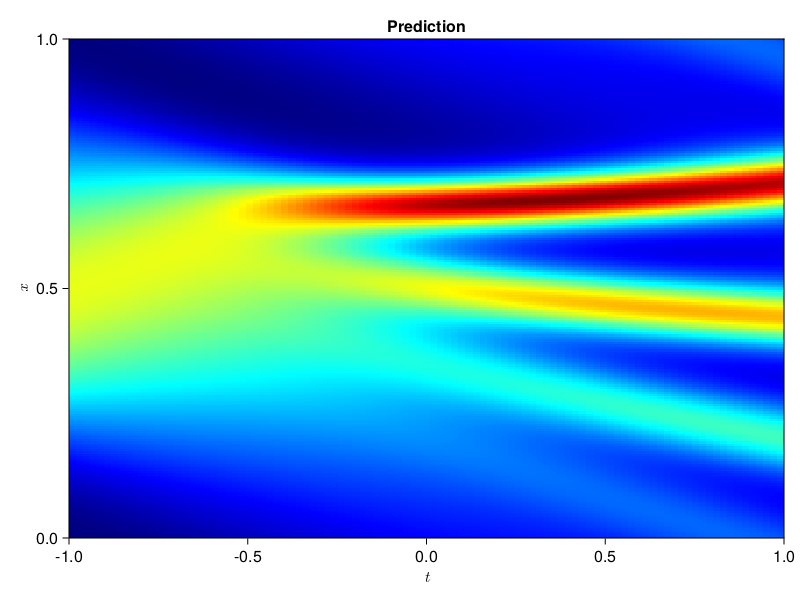

In [10]:
using CairoMakie, MakiePublication

phi = pinn.phi
xs, ts = [infimum(d.domain):0.01:supremum(d.domain) for d in KdV.domain]
axis = (xlabel=L"t", ylabel=L"x", title="Prediction")
u_pred = [sum(pinn.phi([x, t], res.u)) for x in xs, t in ts]
heatmap(ts, xs, u_pred, axis=axis, colormap=:jet)

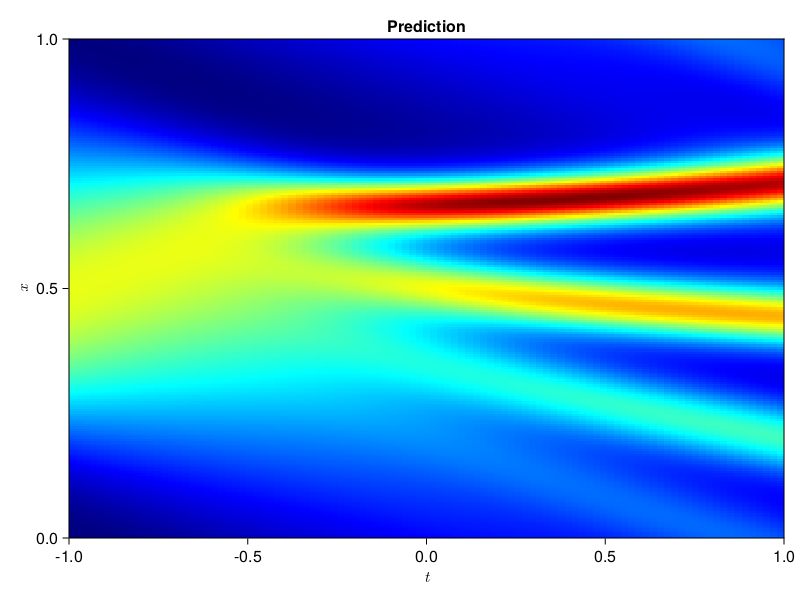

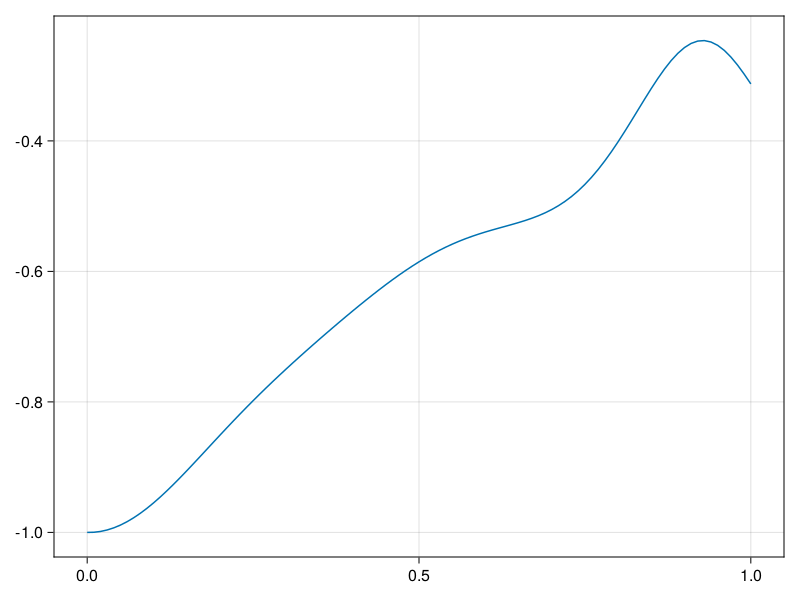

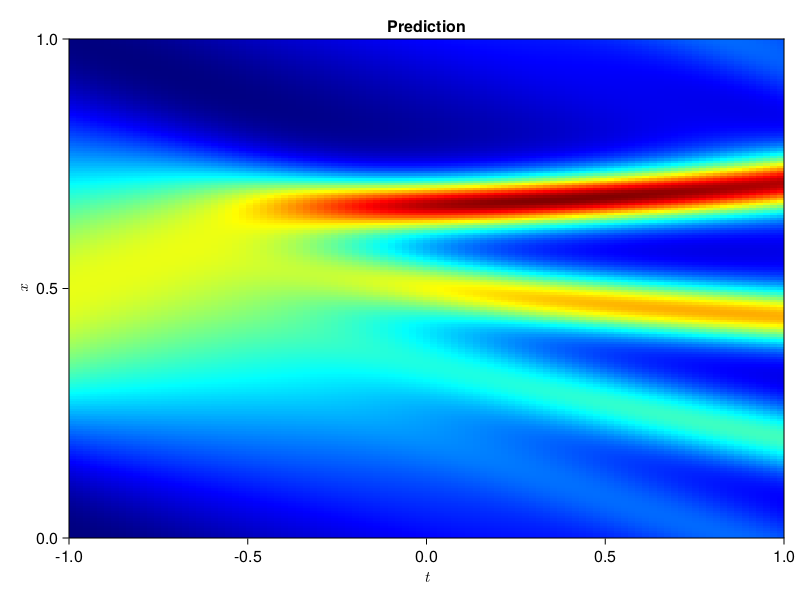

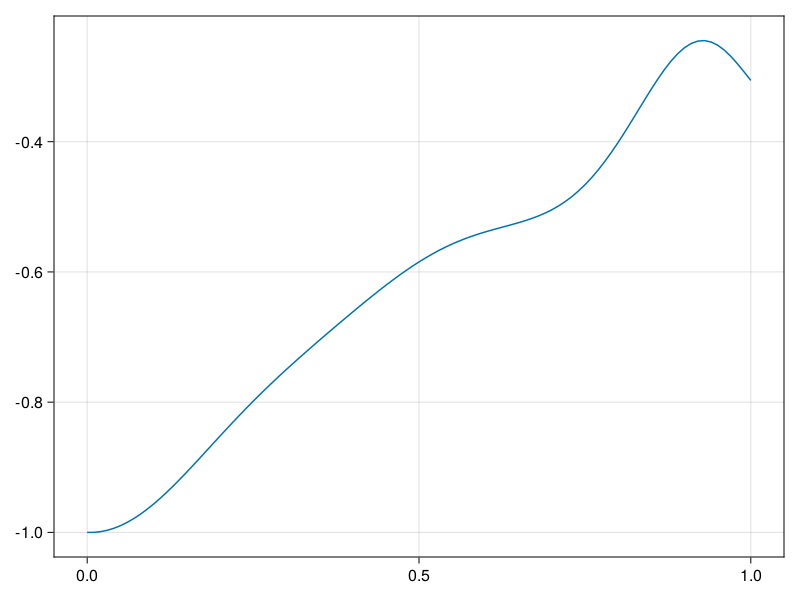

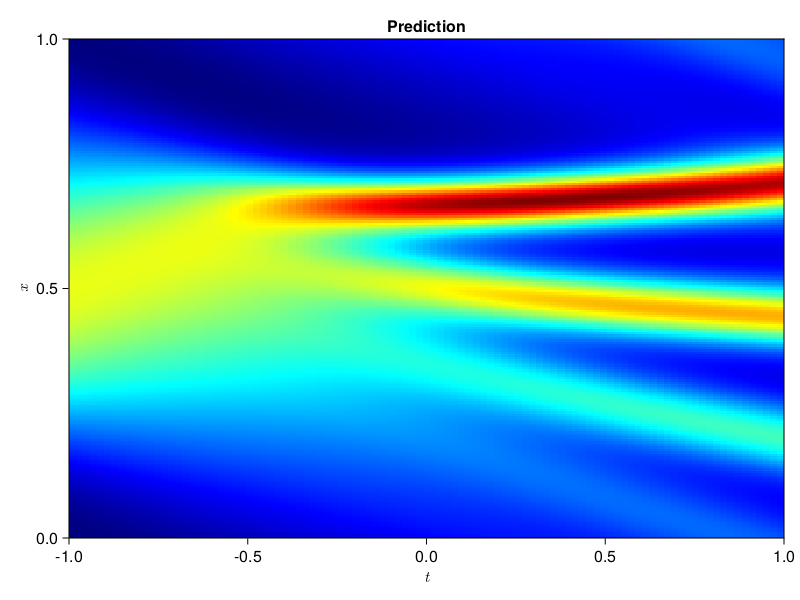

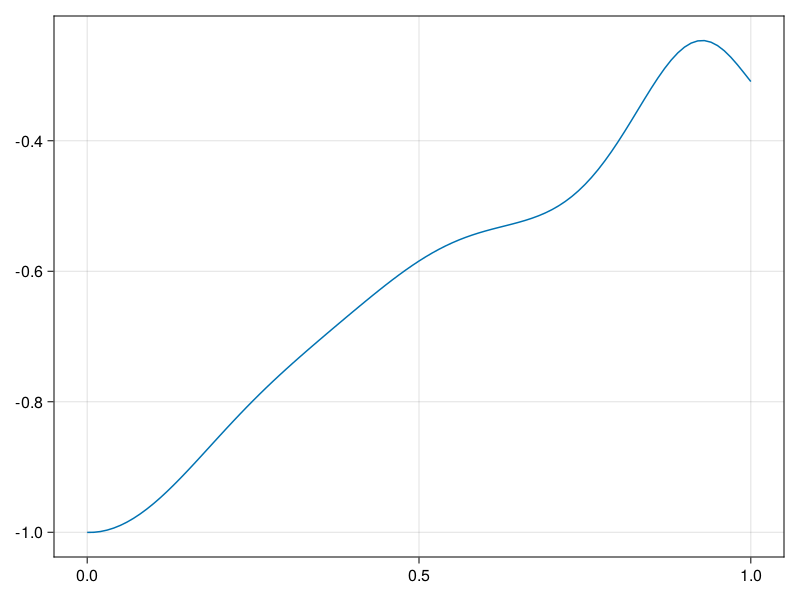

In [11]:
for α in [0.6, 0.8, 1.0] 
    sampler = remake(sampler; α=α)
    data = Sophon.sample(KdV, sampler)
    prob = remake(prob; p=data, u0=res.u)
    res = Optimization.solve(prob, BFGS(); maxiters=1000)

    u_pred = [sum(pinn.phi([x, t], res.u)) for x in xs, t in ts]
    fig, ax, hm = heatmap(ts, xs, u_pred, axis=axis, colormap=:jet)
    display(fig)

    fig2 = lines(vec(xs),vec([sum(pinn.phi([x, 1.0], res.u)) for x in xs]))
    display(fig2)
end


In [ ]:
res.objective